### Introduction to Keras (and tensorflow)

**OBJECTIVES**

- Use `keras` to solve regression and classification problems

In [1]:
from sklearn.datasets import fetch_california_housing, load_digits

### Regression

In [2]:
#!pip install tensorflow
#!pip install keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
houses = fetch_california_housing()

In [11]:
X, y = houses.data, houses.target

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame(X, columns = houses.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sscaler = StandardScaler()

In [74]:
X_train = sscaler.fit_transform(X_train)

In [75]:
X_test = sscaler.transform(X_test)

In [76]:
model = Sequential()

model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [77]:
model.compile(loss = 'mae', metrics = ['mse'])

In [78]:
from keras.utils import plot_model

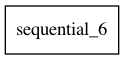

In [79]:
plot_model(model)

In [80]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

In [81]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training 100 Epochs')

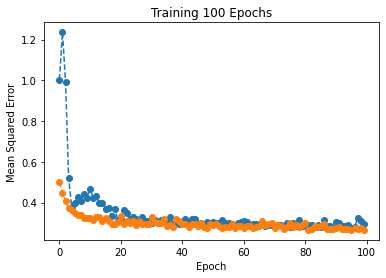

In [82]:
plt.plot(history.history['mse'], '--o')
plt.plot(history.history['val_mse'], '--o')
plt.xlabel('Epoch')
plt.ylabel("Mean Squared Error")
plt.title("Training 100 Epochs")

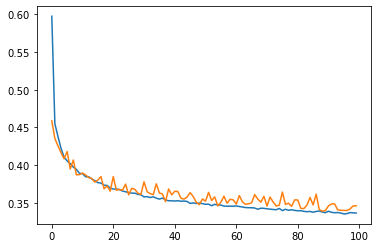

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [84]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 320us/step - loss: 0.3463 - mse: 0.2668


[0.3463449776172638, 0.26683473587036133]

In [85]:
y_test.mean()

2.0816972054263565

In [86]:
y_test[:10]

array([2.   , 1.254, 2.002, 2.193, 2.574, 2.32 , 1.951, 1.52 , 0.858,
       0.584])

In [87]:
model.evaluate(X_train, y_train)

484/484 [==============================] - 0s 307us/step - loss: 0.3385 - mse: 0.2859


[0.3384700119495392, 0.2859330475330353]

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [71]:
mean_squared_error(y_test, preds)

0.508470600827217

### Binary Classification

In [121]:
from sklearn.datasets import load_breast_cancer

In [122]:
cancer = load_breast_cancer()

In [141]:
X, y = cancer.data, cancer.target

In [142]:
model3 = Sequential()
model3.add(Dense(200, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [143]:
model3.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [145]:
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(X_test)

In [146]:
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

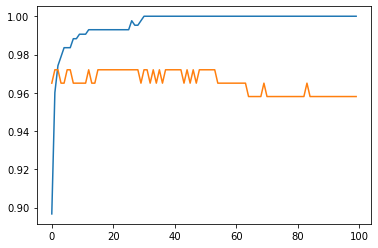

In [147]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [148]:
model3.evaluate(X_test, y_test)

5/5 [==============================] - 0s 508us/step - loss: 0.2898 - accuracy: 0.9580


[0.2898041605949402, 0.9580419659614563]

In [154]:
model4 = Sequential()
model4.add(Dense(200, activation = 'relu'))
model4.add(Dense(2, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [151]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [155]:
history = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

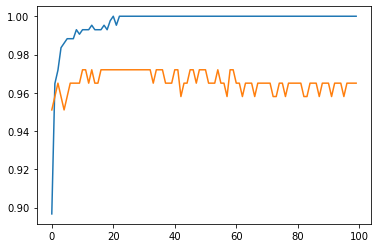

In [156]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Classification

In [88]:
digits = load_digits()

In [161]:
X, y = digits.data, digits.target

In [162]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

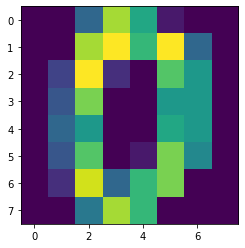

In [163]:
plt.imshow(X[0].reshape(8,8))

In [164]:
model2 = Sequential()

model2.add(Dense(200, activation = 'relu'))
model2.add(Dense(200, activation = 'relu'))
model2.add(Dense(200, activation = 'relu'))

model2.add(Dense(10, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X/255., y)

In [166]:
from keras.utils import to_categorical

In [167]:
y_train = to_categorical(y_train)

In [168]:
y_test = to_categorical(y_test)

In [117]:
history = model2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, verbose = 0)

Epoch 1/30
43/43 [==============================] - 0s 3ms/step - loss: 1.9758 - accuracy: 0.5405 - val_loss: 1.6071 - val_accuracy: 0.4133
Epoch 2/30
43/43 [==============================] - 0s 977us/step - loss: 1.0483 - accuracy: 0.7610 - val_loss: 0.9334 - val_accuracy: 0.7022
Epoch 3/30
43/43 [==============================] - 0s 988us/step - loss: 0.6473 - accuracy: 0.8300 - val_loss: 0.6218 - val_accuracy: 0.8089
Epoch 4/30
43/43 [==============================] - 0s 928us/step - loss: 0.4819 - accuracy: 0.8545 - val_loss: 0.4851 - val_accuracy: 0.8711
Epoch 5/30
43/43 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8879 - val_loss: 0.6483 - val_accuracy: 0.8000
Epoch 6/30
43/43 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8938 - val_loss: 0.3429 - val_accuracy: 0.8889
Epoch 7/30
43/43 [==============================] - 0s 990us/step - loss: 0.3003 - accuracy: 0.9117 - val_loss: 0.3236 - val_accuracy: 0.9044
Epoch 8/30
4

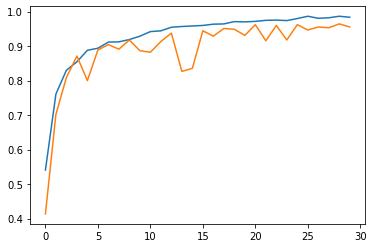

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

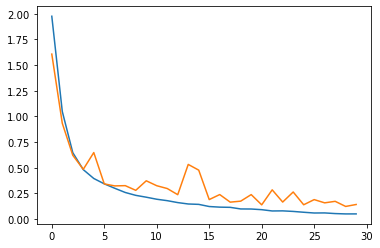

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [120]:
model2.evaluate(X_test, y_test)

15/15 [==============================] - 0s 514us/step - loss: 0.1426 - accuracy: 0.9556


[0.1425708532333374, 0.9555555582046509]

### Merging with `sklearn`

In [157]:
from keras.wrappers.scikit_learn import KerasClassifier

In [158]:
def modeler():
    model2 = Sequential()

    model2.add(Dense(200, activation = 'relu'))
    model2.add(Dense(200, activation = 'relu'))
    model2.add(Dense(200, activation = 'relu'))

    model2.add(Dense(10, activation = 'softmax'))

    model2.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model2

In [160]:
clf = KerasClassifier(build_fn=modeler)

In [169]:
clf.fit(X_train, y_train)

43/43 [==============================] - 0s 621us/step - loss: 1.9669 - accuracy: 0.4937
